In [1]:

#matplotlib inline

# Hu's invariant moments

## Load and display the six images. 

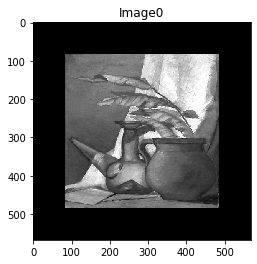

NameError: name 'invmoments' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio


    #INVMOMENTS Compute invariant moments of image.
    # Converted from MATLAB to python by John Sims
    # Original code: Gonzalez and Woods , Digital Image Processing , 2nd Ed .
    
    #PHI = INVMOMENTS ( F ) computes the moment invariants of the image F.
    #
    # PHI is a seven-element row vector containing the moment
    # invariants as defined in equations ( 1 1 . 3 - 1 7 ) through ( 1 1 . 3 - 23 )    
    # F must be a 2-D , real , nonsparse , numeric or logical matrix .
    
    
files = ['painting_original_padded.tif', 'painting_translated_padded.tif',
    'painting_halfsize_padded.tif','painting_mirrored_padded.tif',
    'painting_rot45deg.tif', 'painting_rot90deg_padded.tif']
phitable = np.zeros([7,6])
for f in range(0,6):
    I=imageio.imread(files[f])
    plt.imshow(I,cmap='gray')
    plt.title(f'Image{f}')
    plt.show()
    phi = invmoments(I);
    #phitable(:,f) = -sign(phi)*(log10(abs(phi)));


## Compute image central moments

### Compute m

In [3]:

def compute_m( F ):
    M, N = np.shape(F)
    #print(M,N)
    x, y = np.meshgrid(range(0,N),range(0,M)) 

    #print(x)
    #print(y)
    
    
    A = np.zeros([8,8],dtype='uint8')
    A = A.flatten()
    #print(A)
    
    #Vectorize x , y , and F  to make the summations easier to compute
    x = x.flatten()
    y = y.flatten()
    F = F.flatten() 
    #print(F)
    
    # D I P equat ion ( 11.3-12 )Appendix C

    m = dict(
        m00 = sum(F),
        m10 = sum(x*F),
        m01 = sum(y*F),
        m11 = sum(x*y*F),
        m20 = sum(x**2*F),
        m02 = sum(y**2*F),
        m30 = sum(x**3*F),
        m03 = sum(y**3*F),
        m12 = sum(x*y**2*F),
        m21 = sum(x**2*y*F)
    )

    #Protect against divide-by-zero warnings.
    if ( m.get('m00') == 0 ):
        m.moo = np.finfo(float).eps
        
    return m
    #

### Compute $\eta$

In [4]:
def compute_eta(m):
    #D I P equations(11.3-14) through ( 11 . 3 - 16 ) .
    m00 = m.get('m00')
    m01 = m.get('m01')
    m10 = m.get('m10')
    m11 = m.get('m11')
    m20 = m.get('m20')
    m02 = m.get('m02')
    m21 = m.get('m21')
    m12 = m.get('m12')    
    m03 = m.get('m03')
    m30 = m.get('m30')
               
    
    xbar= m10 / m00
    ybar= m01 / m00
    e = dict(
        eta11 = (m11 - ybar*m10) / m00**2,
        eta20 = (m20 - xbar*m10) / m00**2, 
        eta02 = (m02 - ybar*m01) / m00**2, 
        eta30 = (m30 - 3 * xbar * m20 + 2 * xbar**2 * m10) / m00**2.5,
        eta03 = (m03 - 3 * ybar * m02 + 2 * ybar**2 * m01) / m00**2.5,
        eta21 = (m21 - 2 * xbar * m11 - ybar * m20 + 2 * xbar**2 * m01) / m00**2.5, 
        eta12 = (m12 - 2 * ybar * m11 - xbar * m02 + 2 * ybar**2 * m10) / m00**2.5
    )
    
    return e

### compute $\phi$

In [5]:
def compute_phi(e):
    #DIP equations ( 1 1 . 3 - 1 7 ) through ( 1 1 . 3 - 23 ) .
    eta00 = e.get('eta00')
    eta01 = e.get('eta01')
    eta10 = e.get('eta10')
    eta11 = e.get('eta11')
    eta20 = e.get('eta20')
    eta02 = e.get('eta02')
    eta21 = e.get('eta21')
    eta12 = e.get('eta12')    
    eta03 = e.get('eta03')
    eta30 = e.get('eta30')   
    
    phi = np.zeros((7,1))
    phi[0] = eta20 + eta02 
    phi[1] = (eta20 - eta02)**2 + 4*eta11**2 
    phi[2] = (eta30 - 3*eta12)**2 + (3*eta21 - eta03)**2 
    phi[3] = (eta30 + eta12)**2 + (eta21 + eta03)**2
    phi[4] = (eta30 - 3 * eta12) * (eta30 + eta12) * \
        (( eta30 + eta12)**2 - 3*(eta21 + eta03)**2) + \
        ( 3 * eta21 - eta03) * (eta21 + eta03) * \
        ( 3 * (eta30 + eta12)**2 - ( eta21 + eta03 )**2) 
    phi[5]= (eta20 - eta02) * ((eta30 + eta12)**2 - \
        ( eta21 + eta03 )**2) + \
        4 * eta11 * (eta30 + eta12) * (eta21 + eta03)
    phi[6] = (3*eta21 - eta03 ) * (eta30 + eta12) * \
        ( (eta30 + eta12)**2 - 3*(eta21 + eta03)**2) + \
        ( 3 * eta12 - eta30) * (eta21 + eta03) * \
        ( 3 * (eta30 + eta12)**2 - (eta21 + eta03)**2) 
    return phi


In [6]:
compute_phi(compute_eta(compute_m(I)))

array([[ 1.36095782e-03],
       [ 7.47242250e-08],
       [ 3.88213845e-11],
       [ 4.22443823e-11],
       [ 4.29169993e-22],
       [ 1.14370270e-14],
       [-1.65605287e-21]])

In [7]:
def invmoments ( F ):
    #INVMOMENTS Compute invariant moments of image.
    # Converted from MATLAB to python by John Sims February 2020
    
    # Original code: Gonzalez,  Woods and Eddins , Digital Image Processing , 2nd Ed .
    
    #PHI = INVMOMENTS ( F ) computes the moment invariants of the image F.
    #
    # PHI is a seven-element row vector containing the moment
    # invariants as defined in equations ( 1 1 . 3 - 1 7 ) through ( 1 1 . 3 - 23 ) of
    
    # F must be a 2-D , real , nonsparse , numeric or logical matrix .
    #if (ndims(F) ~= 2 ) || issparse ( F ) || ~isreal ( F ) ||
    #     ~( isnumeric ( F ) || islogical ( F ) )
    #    error([ ' F must be a 2 - D , real , non sparse , numeric or logical matrix.'])
    #end
    
    phi = compute_phi (compute_eta ( compute_m(F)))
    return phi


In [8]:
phitable = np.zeros([6,7])

for f in range(0,6):
    I=imageio.imread(files[f])
    phi = np.transpose(invmoments(I))
        
    phitable[f] = -np.sign(phi)*(np.log10(abs(phi)))
    
print(np.transpose(phitable) )


[[  2.86615533   2.86615533   2.86640899   2.86615533   2.86614083
    2.86615533]
 [  7.12653858   7.12653858   7.12571946   7.12653858   7.12662265
    7.12653858]
 [ 10.41092898  10.41092898  10.40473359  10.41092898  10.41145369
   10.41092898]
 [ 10.37423104  10.37423104  10.37194419  10.37423104  10.37421917
   10.37423104]
 [ 21.36737065  21.36737065  21.39237045  21.36737065  21.36628138
   21.36737065]
 [ 13.94168685  13.94168685  13.93830873  13.94168685  13.94174472
   13.94168685]
 [-20.7809258  -20.7809258  -20.77243586  20.7809258  -20.78126022
  -20.7809258 ]]


## Note that for $\phi_6$ (7th line) the mirrored image feature is positive but the other are negative.  